In [1]:
# -*- coding: utf-8 -*-

get_ipython().magic(u'matplotlib inline')
import seaborn
import numpy
import scipy
import matplotlib.pyplot as plt
import pandas
import IPython.display as ipd
import librosa
import librosa.display
import random
import numpy as np
from numpy import dot as matrixmultiply
from scipy.signal import hilbert, chirp
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (16, 8)


In [2]:
# carregar amostra original

(x, sr) = librosa.load('Luiz Bonfá - Seville.wav')  # x é a matriz de áudio e sr=taxa de amostragem
ipd.Audio(x, rate=sr)

In [3]:
# primeiro, fixar parâmetros STFT

hop_length = 512
n_fft = 2048

# Calcuar STFT

S = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
X = abs(S) ** 2  # obter magnitude do espectograma

1


/home/hosana/.local/lib/python2.7/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]
/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


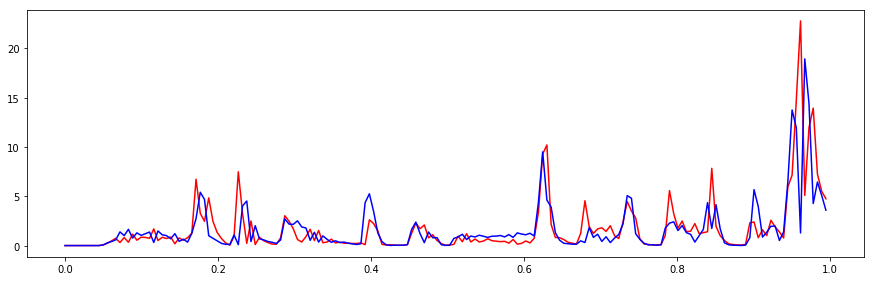

2


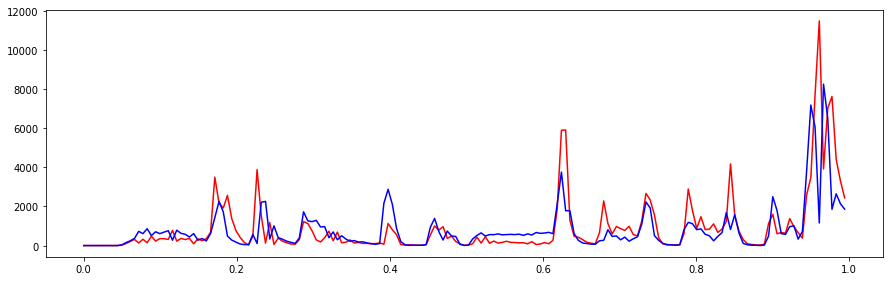

3


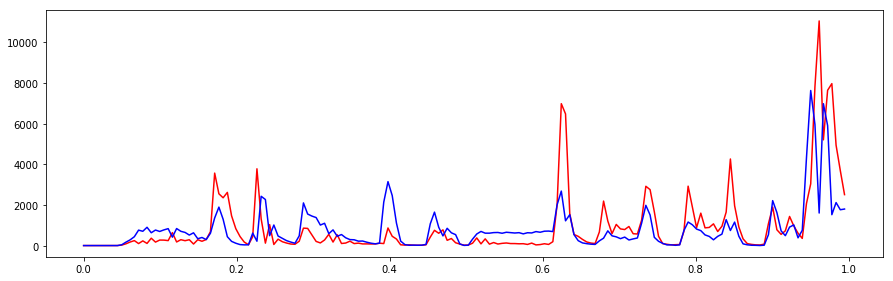

4


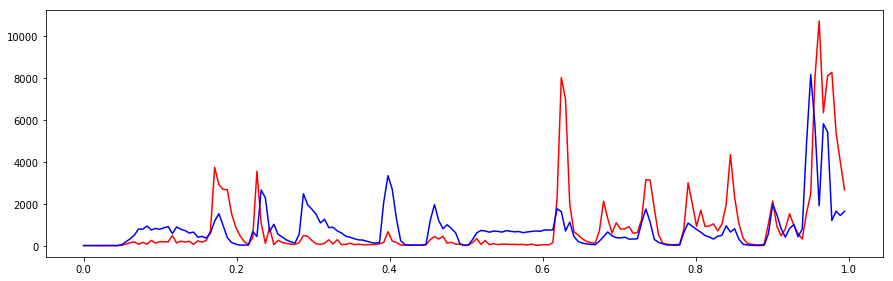

5


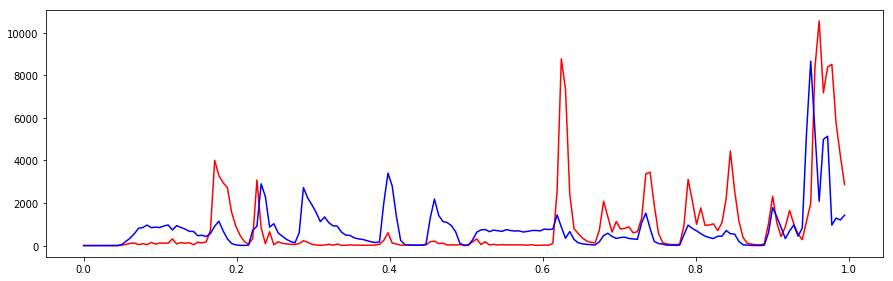

6


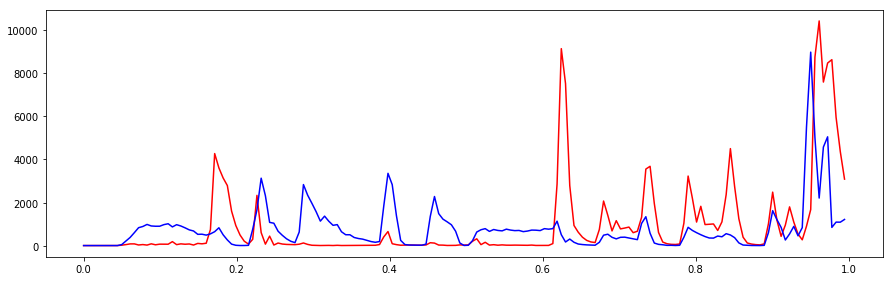

7


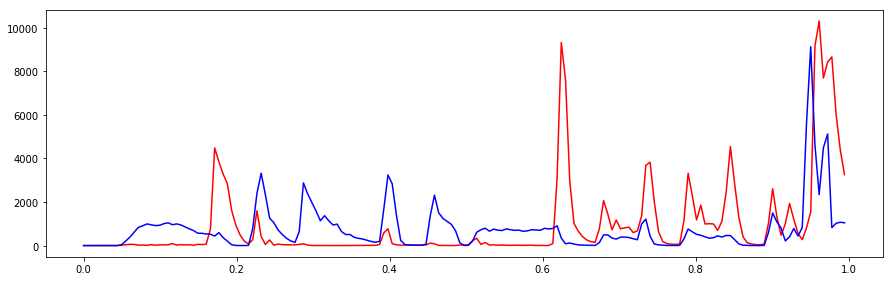

8


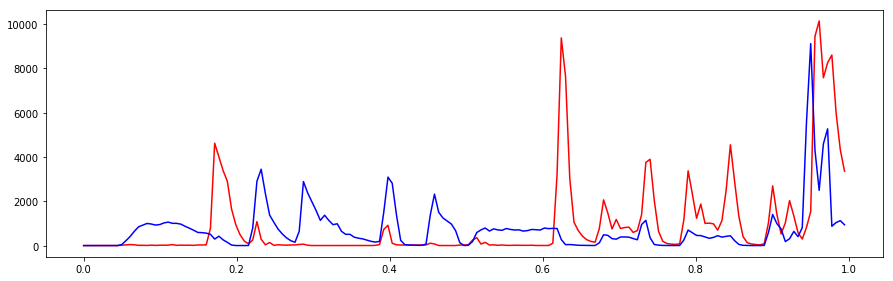

9


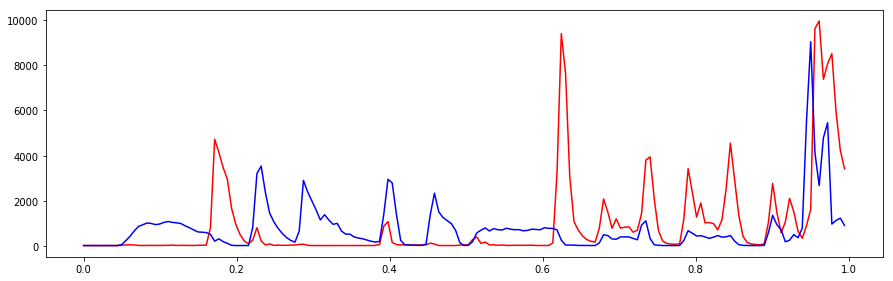

10


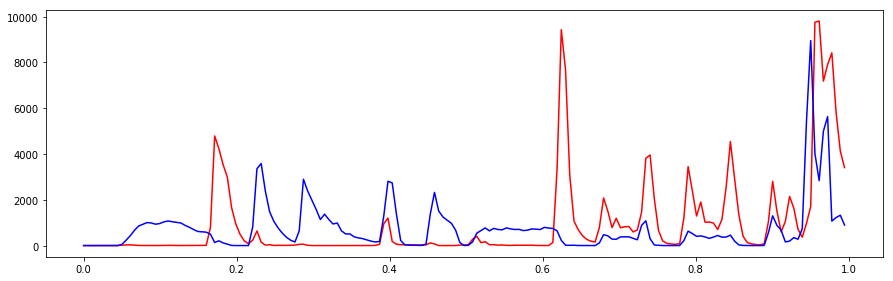

11


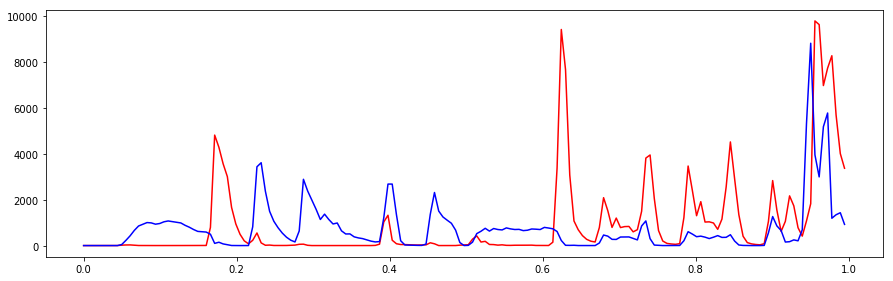

12


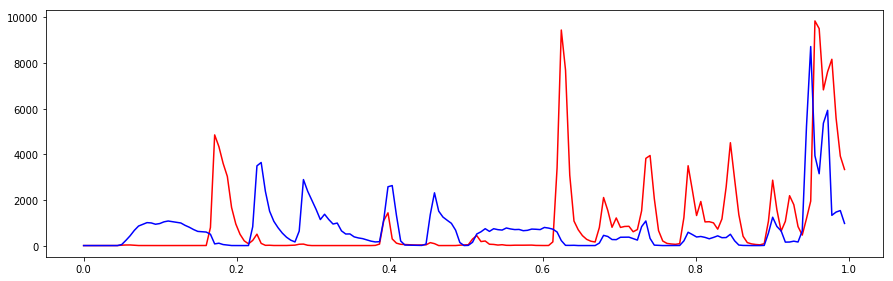

13


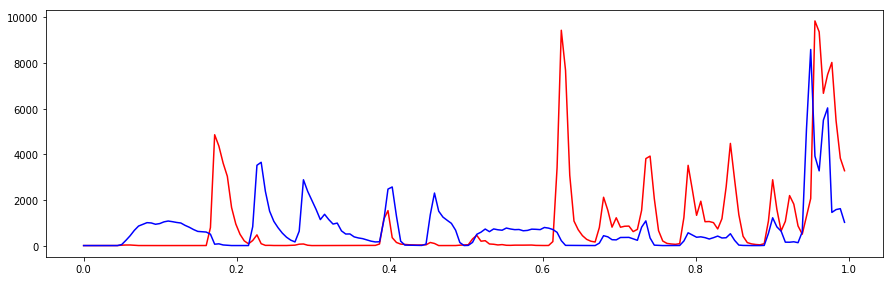

14


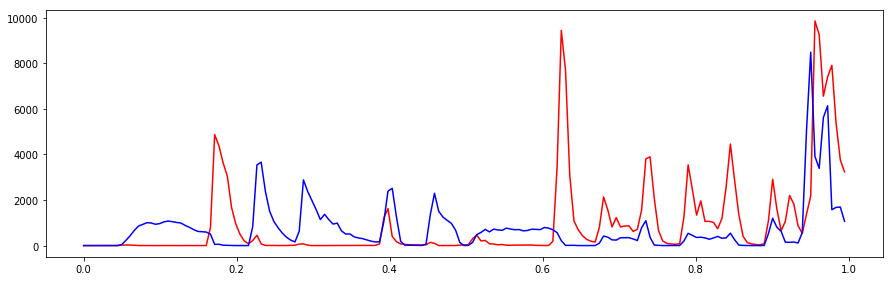

15


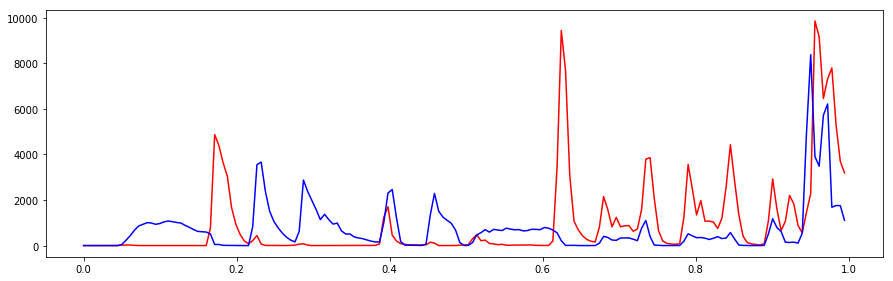

16


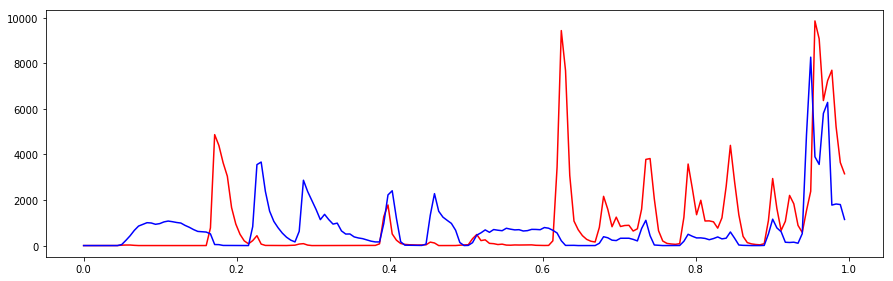

17


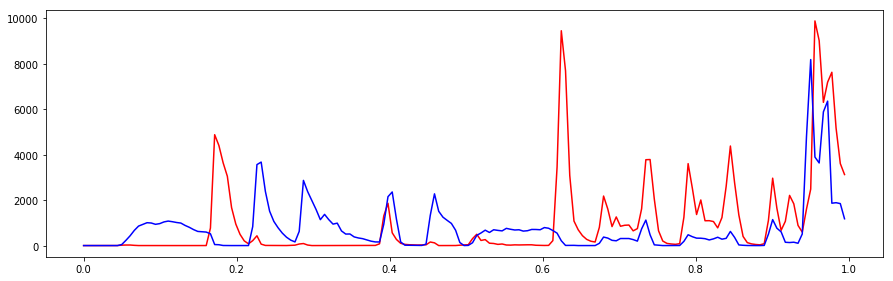

18


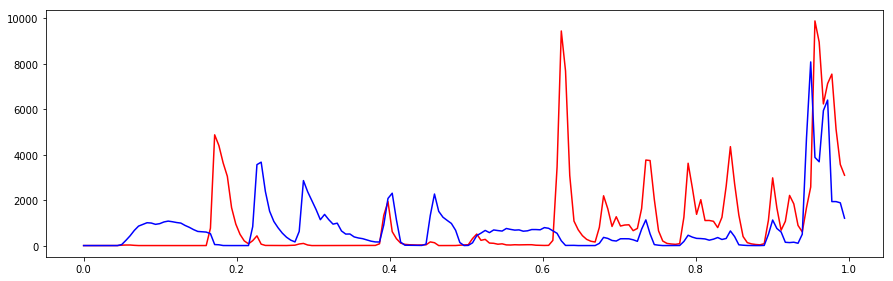

19


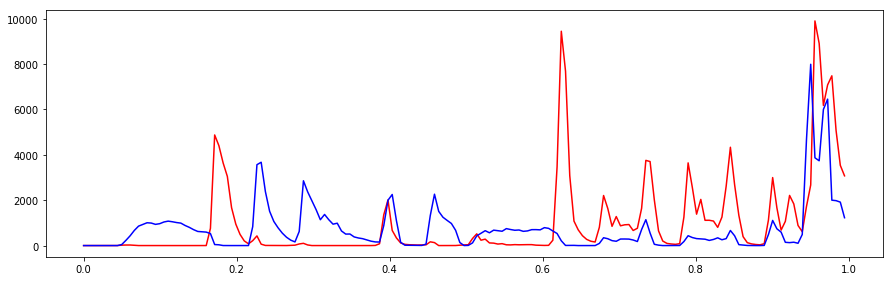

20


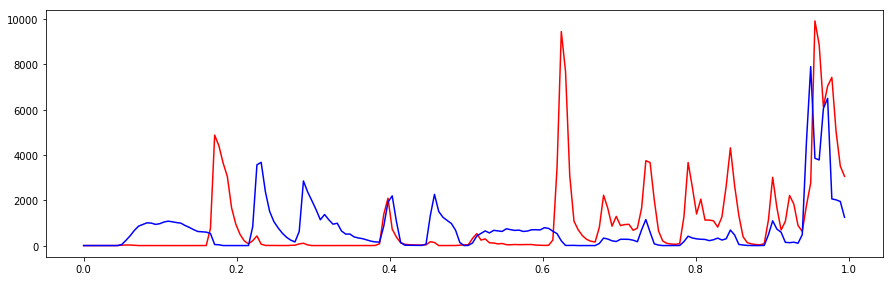

21


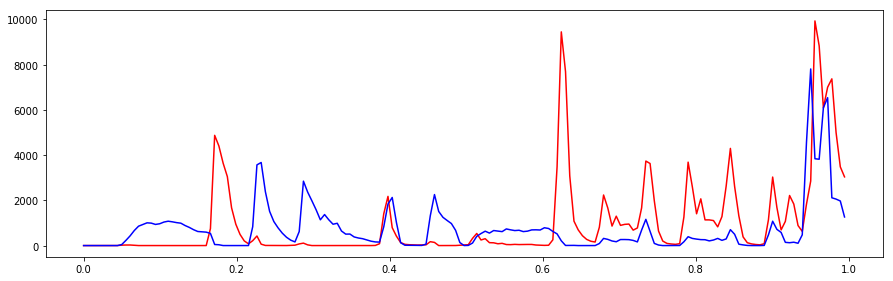

22


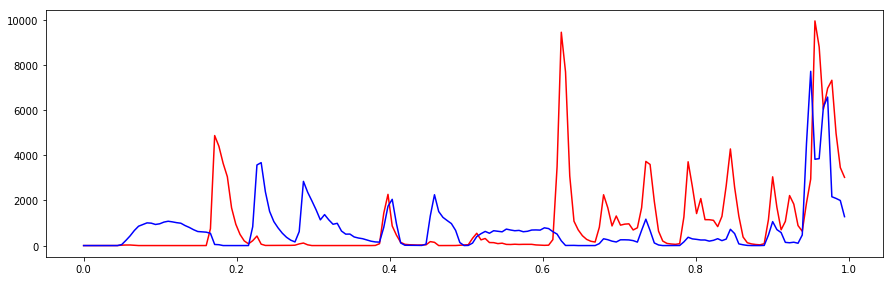

23


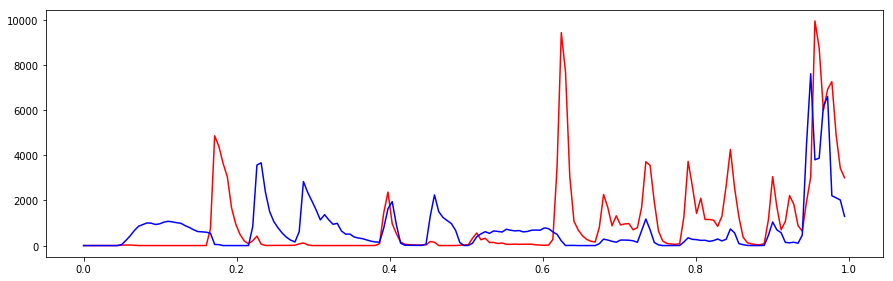

24


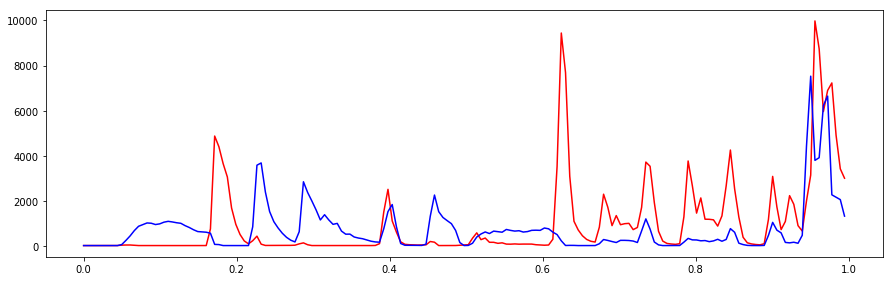

25


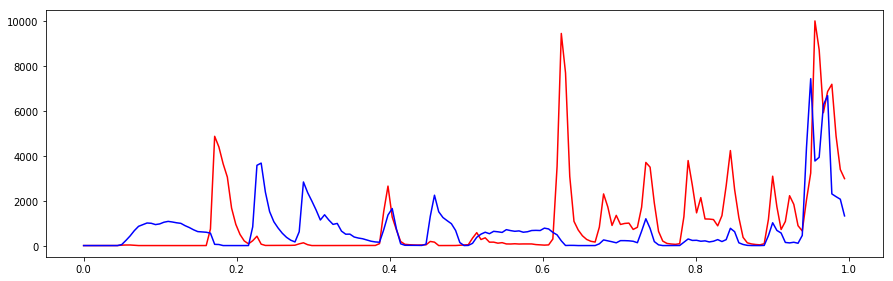

26


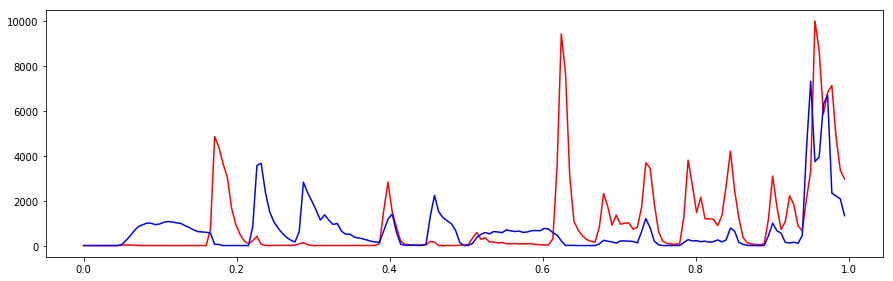

27


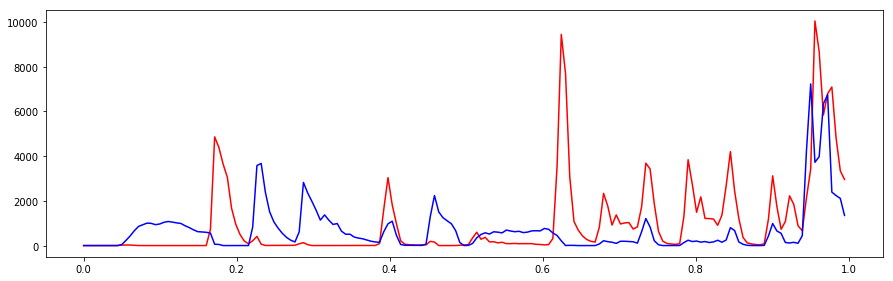

28


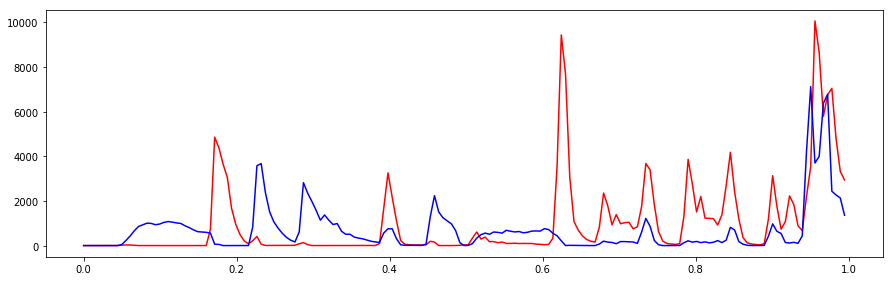

29


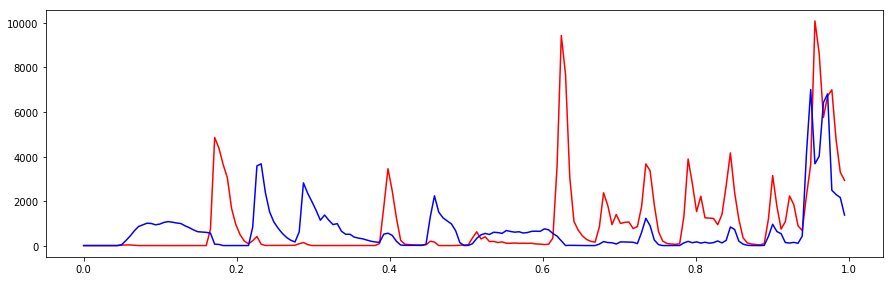

In [4]:
# definir parâmetros NMF

numComp = 2  # número de componentes
numIter = 30  # n de interações
(numBins, numFrames) = X.shape

# primeiro, o treinamento NMF no espectrograma da amostra original
# inicializar

B = np.random.rand(numBins, numComp)  # matriz
G = np.random.rand(numComp, numFrames)  # matriz
OnesMat = numpy.ones((numBins, numFrames), dtype=np.float)  # cria uma matriz numBis X numFrames de 1's

for it in range(1, numIter):
    print it
    Xtilde = np.spacing(1) + matrixmultiply(B, G)  # atualizando o modelo
    Xratio = X / Xtilde  # atualização de taxa

    # ativações de atualização

    Blinha = B.conj().transpose()
    G = G * matrixmultiply(Blinha, Xratio) / matrixmultiply(Blinha,OnesMat)
    Xtilde = np.spacing(1) + matrixmultiply(B, G)
    Xratio = X / Xtilde
    Glinha = G.conj().transpose()
    B = B * matrixmultiply(Xratio, Glinha) / matrixmultiply(OnesMat,Glinha)
    normB = np.spacing(1) + B.sum(axis=0)
    B = np.multiply(B, 1 / normB)

    # Plotar as componentes NFM

    duration = 1.0
    fs = 181.0
    samples = int(fs * duration)
    t = np.arange(samples) / fs
    analytic_signal = hilbert(Glinha)
    amplitude_envelope = np.abs(analytic_signal)
    fig = plt.figure(figsize=(15, 10))
    ax0 = fig.add_subplot(211)
    plt.gca().set_color_cycle(['red', 'blue'])
    ax0.plot(t, amplitude_envelope)
    plt.savefig('ultimaIterOriginalBonfa1.png')
    plt.show()


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  del sys.path[0]


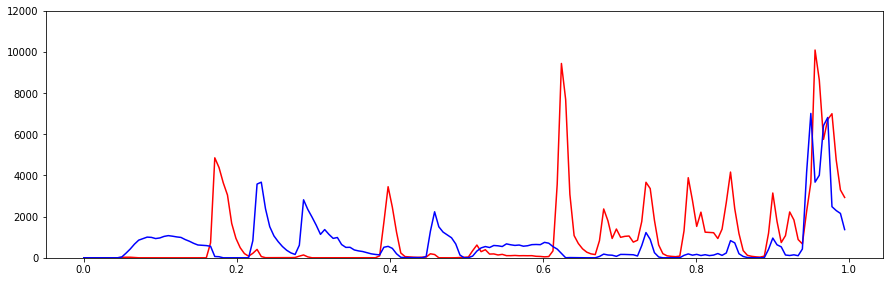

In [5]:
# Plotar componentes NFM

duration = 1.0
fs = 181.0
samples = int(fs * duration)
t = np.arange(samples) / fs

analytic_signal = hilbert(Glinha)
amplitude_envelope = np.abs(analytic_signal)

fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(211)
plt.gca().set_color_cycle(['red', 'blue'])
ax0.plot(t, amplitude_envelope)
plt.ylim(0, 12000)
plt.show()

/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


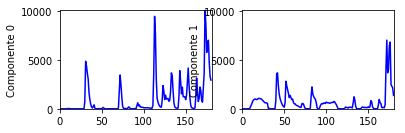

In [6]:
# Plotar componentes separadas amostra original

plt.figure()
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['blue'])
    plt.plot(G[n])
    plt.ylim(0, G.max())
    plt.xlim(0, G.shape[1])
    plt.ylabel('Componente %d' % n)
    plt.savefig('bonfacomp.png')
G1 = G

In [7]:
# Reproduzir o sinal de cada componente

reconstructed_signal = scipy.zeros(len(x))
for n in range(numComp):
    Y = scipy.outer(B[:, n], G[n]) * numpy.exp(1j * numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    ipd.display(ipd.Audio(y, rate=sr))

In [8]:
# Em seguida, repare os modelos aprendidos e aplique-os ao suspeito de plágio mais alguns componentes extras

storeB = B  # componentes extras
numCompFixed = numComp
numComp = 2

In [9]:
# carregar amostra suspeita

(x, sr) = librosa.load('Gotye - Somebody That I Used To Know.wav')  # x = a matriz de áudio e sr=taxa de amostragem
ipd.Audio(x, rate=sr)

In [10]:
# Calcuar STFT

S = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

X = abs(S) ** 2  # obter magnitude do espectograma

# get dimensions

(numBins, numFrames) = X.shape

B = np.random.rand(numBins, numComp)
G = np.random.rand(numComp, numFrames)
OnesMat = numpy.ones((numBins, numFrames), dtype=np.float)


1


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


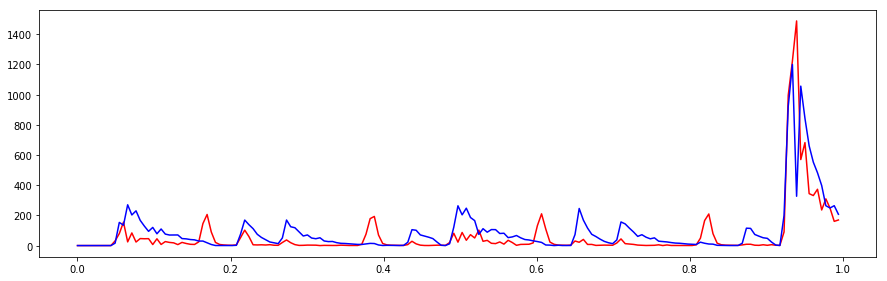

2


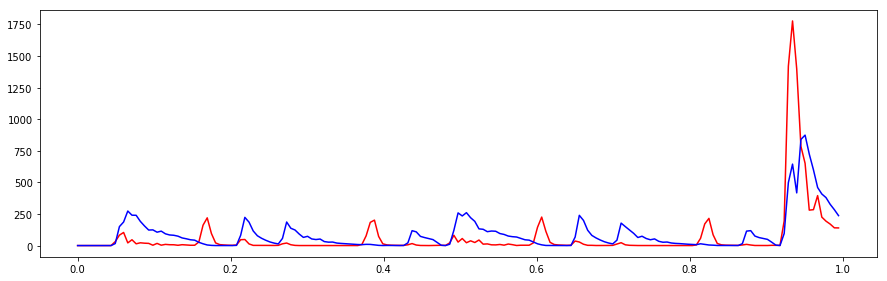

3


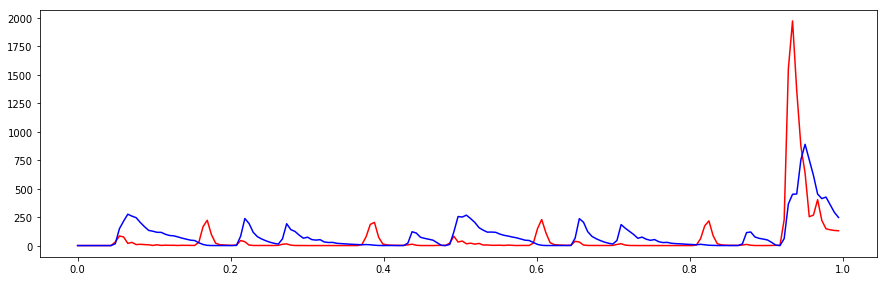

4


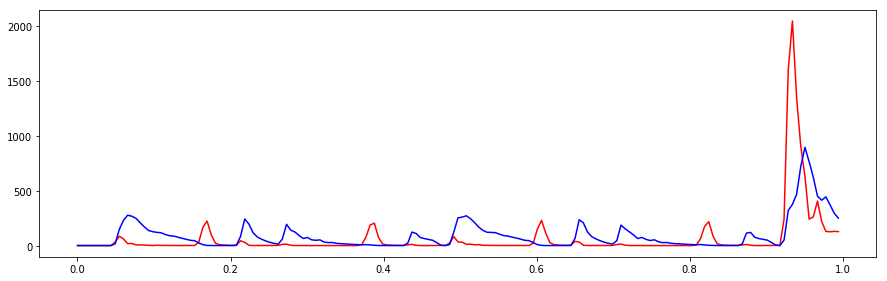

5


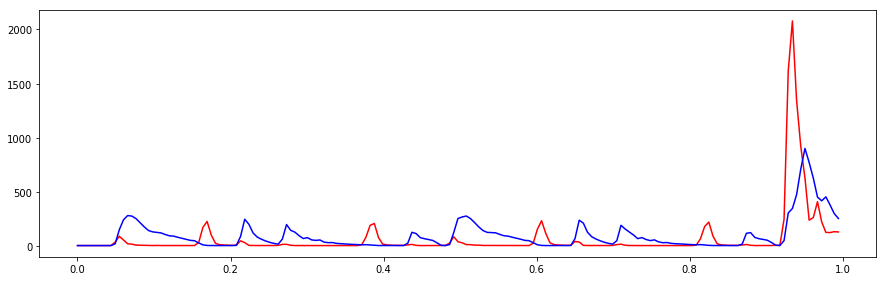

6


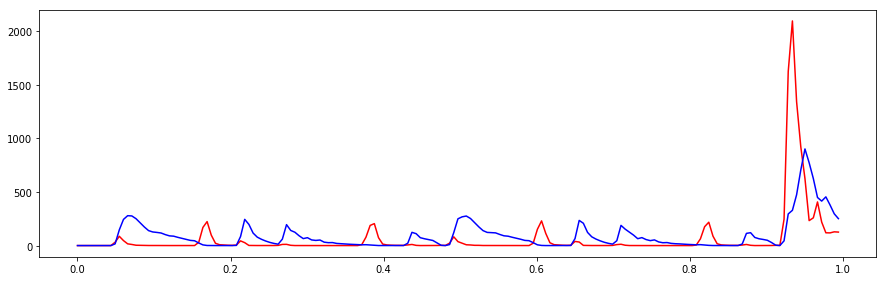

7


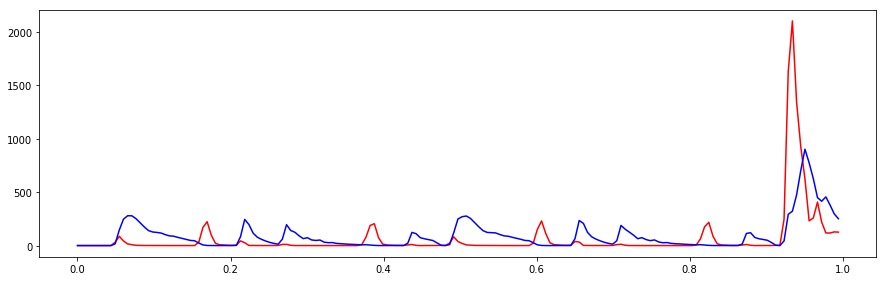

8


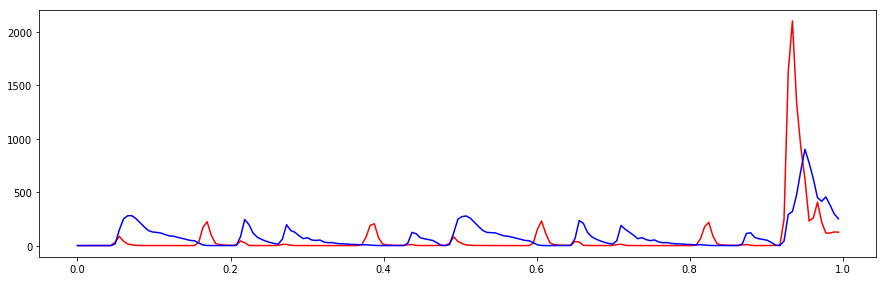

9


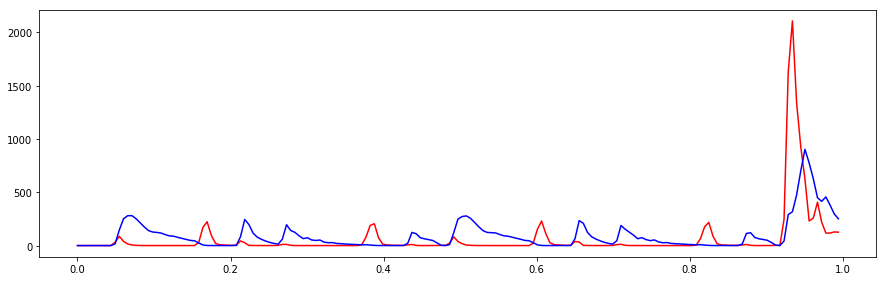

10


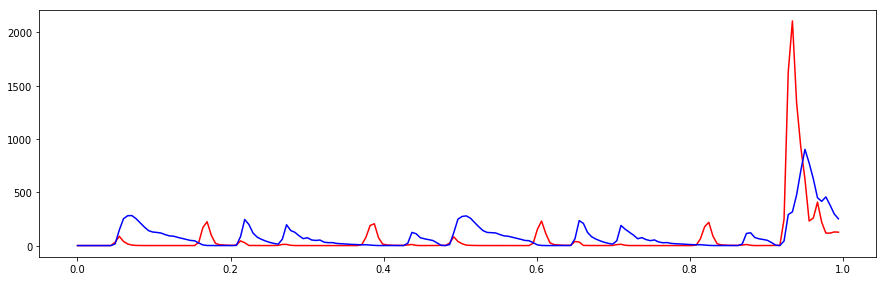

11


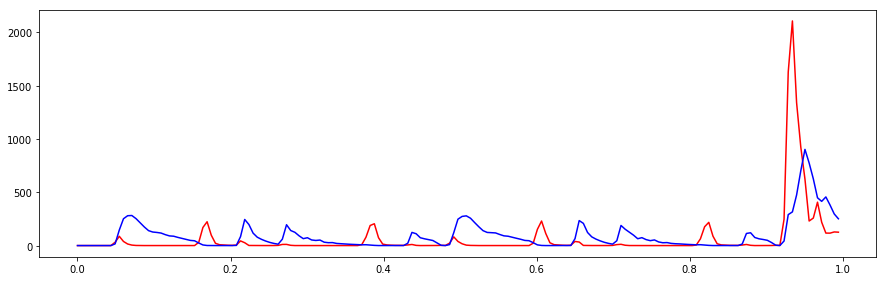

12


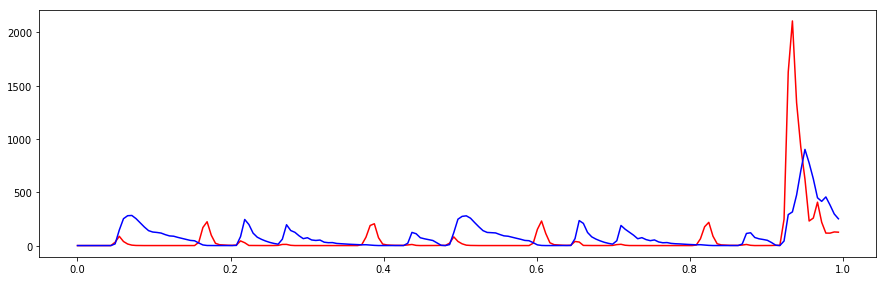

13


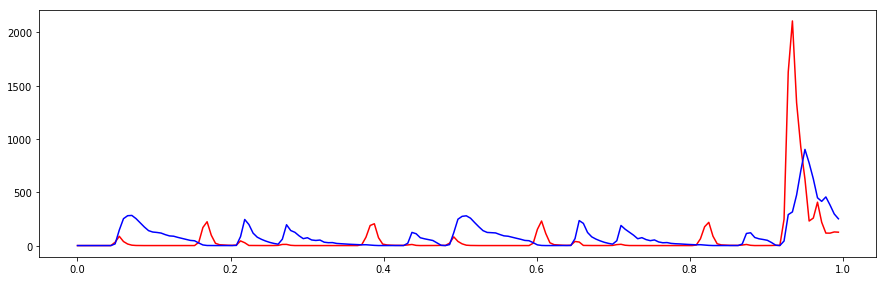

14


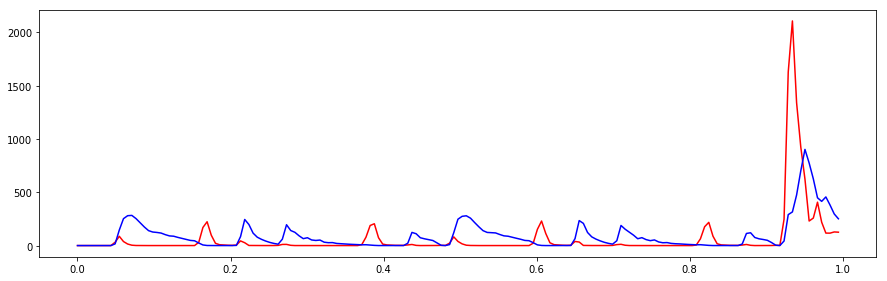

15


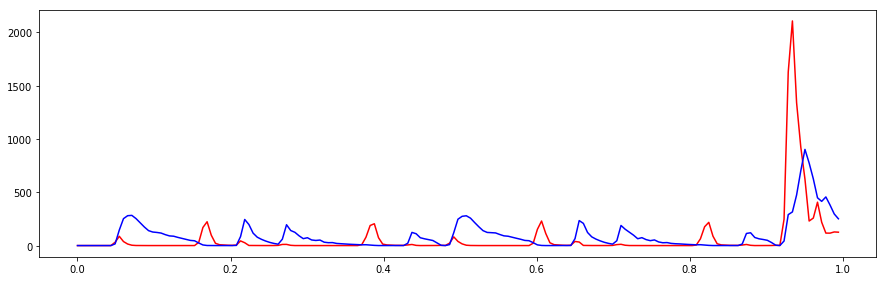

16


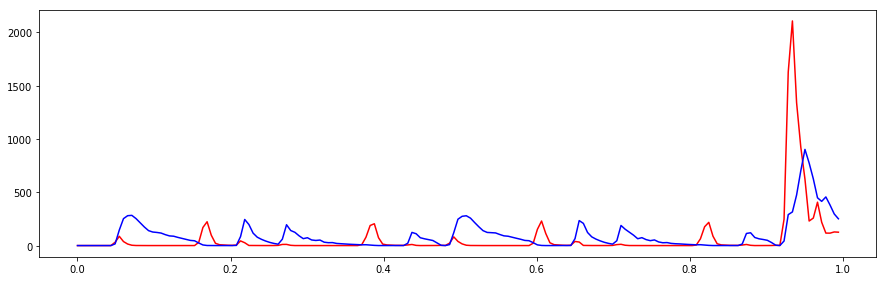

17


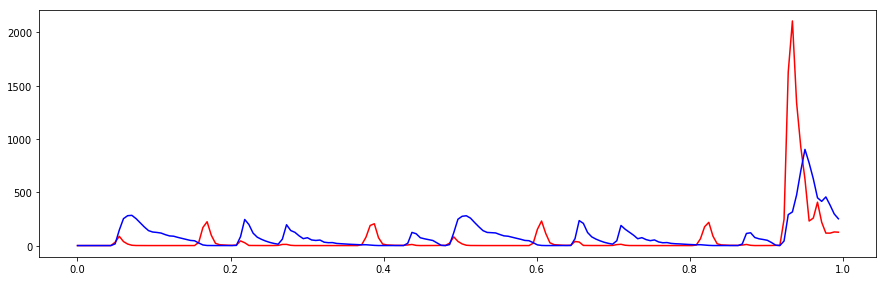

18


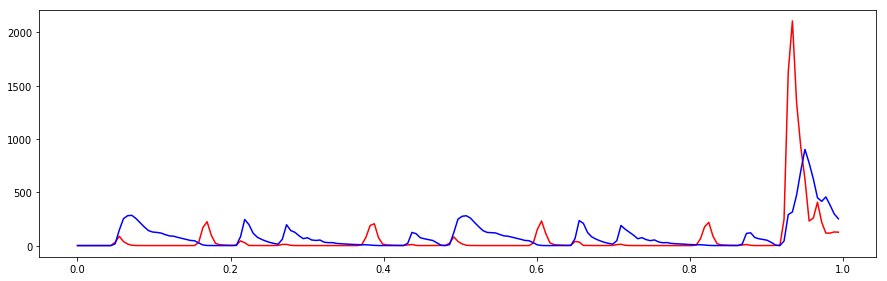

19


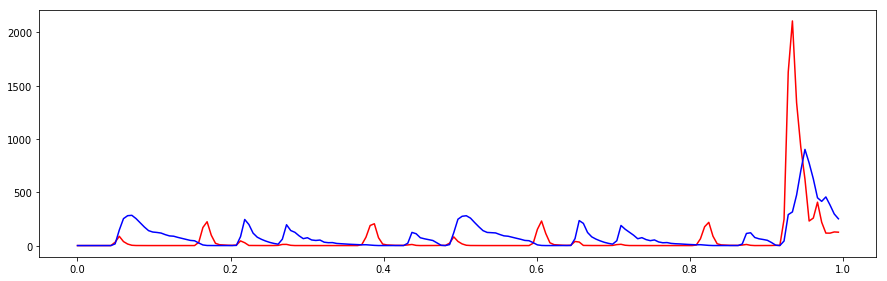

20


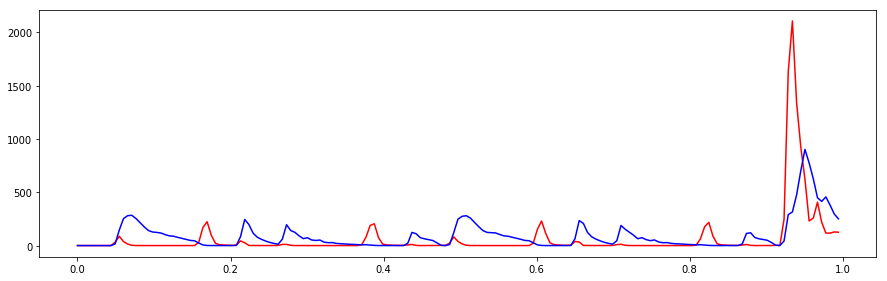

21


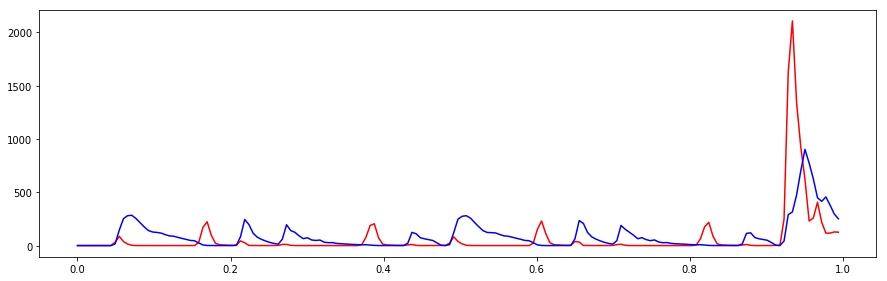

22


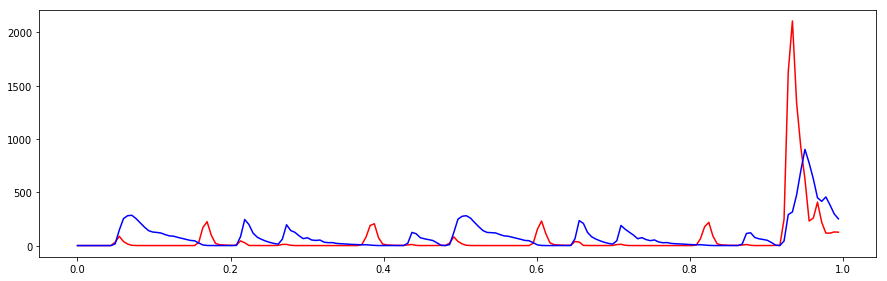

23


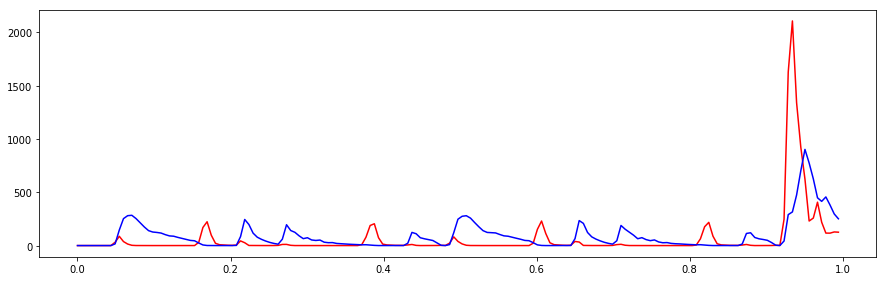

24


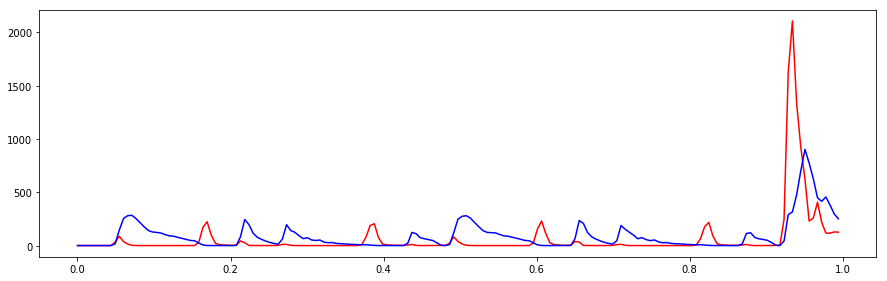

25


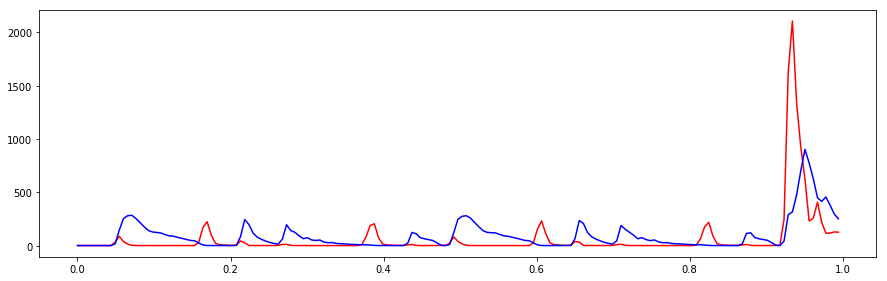

26


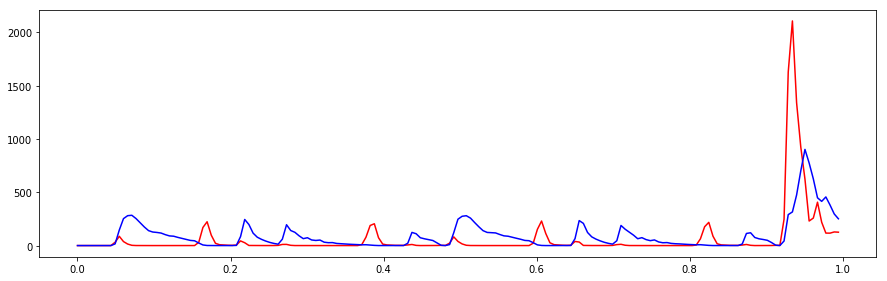

27


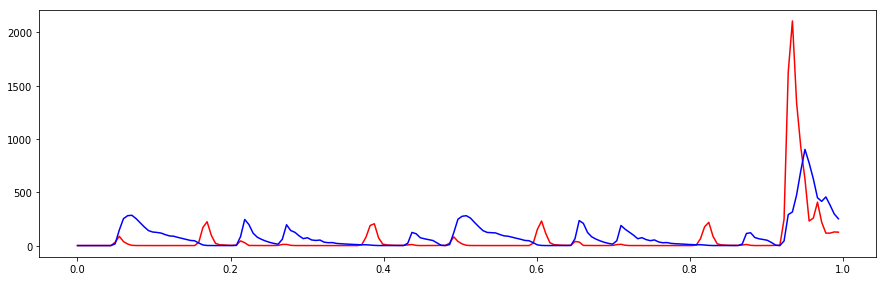

28


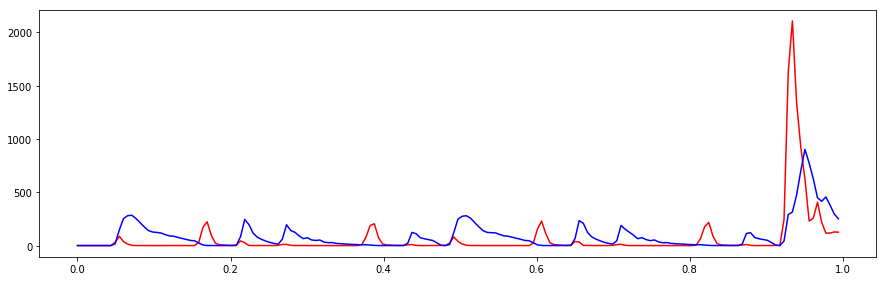

29


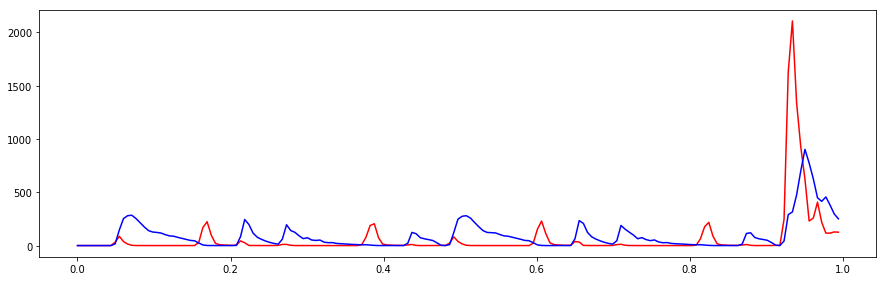

In [11]:
# inicializar os primeiros modelos com os que já foram aprendidos

B[:, 0:numCompFixed] = storeB

for it in range(1, numIter):
    print it
    Xtilde = np.spacing(1) + matrixmultiply(B, G)
    Xratio = X / Xtilde  # atualização de taxa
    Blinha = B.conj().transpose()  # ativações de atualização
    G = G * matrixmultiply(Blinha, Xratio) / matrixmultiply(Blinha,OnesMat)
    Xtilde = np.spacing(1) + matrixmultiply(B, G)
    Xratio = X / Xtilde
    Glinha = G.conj().transpose()
    B = B * matrixmultiply(Xratio, Glinha) / matrixmultiply(OnesMat,Glinha)
    B[:, 0:numCompFixed] = storeB
    normB = np.spacing(1) + B.sum(axis=0)
    B = np.multiply(B, 1 / normB)

    # Plotar as componentes NFM

    duration = 1.0
    fs = 183.0
    samples = int(fs * duration)
    t = np.arange(samples) / fs
    analytic_signal = hilbert(Glinha)
    amplitude_envelope = np.abs(analytic_signal)
    fig = plt.figure(figsize=(15, 10))
    ax0 = fig.add_subplot(211)
    plt.gca().set_color_cycle(['red', 'blue'])
    ax0.plot(t, amplitude_envelope)

    
    plt.savefig('ultimaIterPlagioGotye2.png')
    plt.show()


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  del sys.path[0]


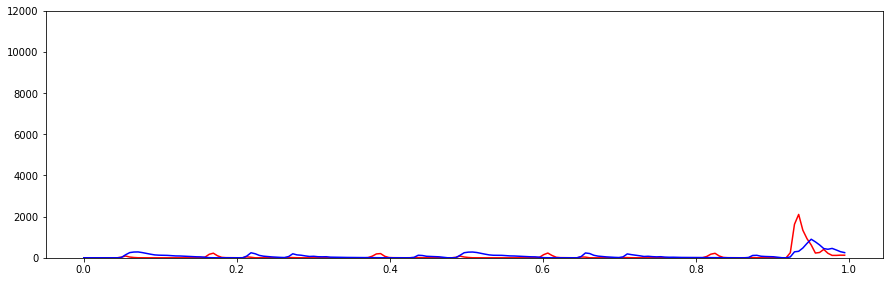

In [12]:
# Plotar as componentes NFM

duration = 1.0
fs = 183.0
samples = int(fs * duration)
t = np.arange(samples) / fs

analytic_signal = hilbert(Glinha)
amplitude_envelope = np.abs(analytic_signal)

fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(211)
plt.gca().set_color_cycle(['red', 'blue'])
ax0.plot(t, amplitude_envelope)
plt.ylim(0, 12000)

plt.show()


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


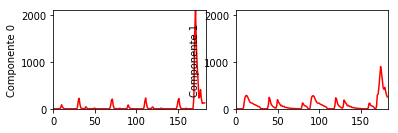

In [13]:
# Plotar componentes separadas amostra suspeita

plt.figure()
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['red'])
    plt.plot(G[n])
    plt.ylim(0, G.max())
    plt.xlim(0, G.shape[1])
    plt.ylabel('Componente %d' % n)
    plt.savefig('gotyecomp.png')

reconstructed_signal = scipy.zeros(len(x))
for n in range(numComp):
    Y = scipy.outer(B[:, n], G[n]) * numpy.exp(1j * numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    ipd.display(ipd.Audio(y, rate=sr))

(2, 183)


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


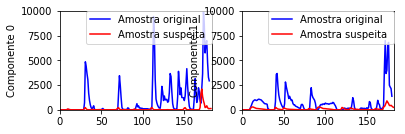

In [14]:
# Plotar componentes juntas da amostra original e suspeita

plt.figure()
print G.shape
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['blue', 'red'])
    plt.plot(G1[n], label='Amostra original')
    plt.plot(G[n], label='Amostra suspeita ')

    # plt.ylim(0,max(G1[n].max(),(G[n]).max()))

    plt.ylim(0, 10000)
    plt.xlim(0, G.shape[1])
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
    plt.ylabel('Componente %d' % n)
    plt.savefig('bonfaegotyecomp.png')

(2, 183)


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


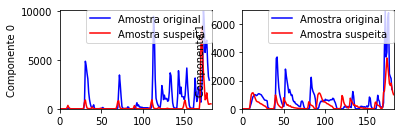

In [15]:
# Plotar componentes juntas da amostra original e suspeita

plt.figure()
print G.shape
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['blue', 'red'])
    plt.plot(G1[n], label='Amostra original')
    plt.plot(G[n] * 4, label='Amostra suspeita ')
    plt.ylim(0, max(G1[n].max(), (G[n] * 4).max()))
    plt.xlim(0, G.shape[1])
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
    plt.ylabel('Componente %d' % n)
    plt.savefig('bonfaegotyecomp4.png')